# Setup

The functions $\sqrt2, (\sqrt2\sin(2\pi k))_{k\in\mathbb Z_{>0}}, (\sqrt2\cos(2\pi k))_{k\in\mathbb Z_{>0}}$ form an orthonormal basis of $L^2(\mathbb T,\mathbb R)$. Specifically, for any $u\colon \mathbb R_{\ge0} \times \mathbb T \to \mathbb R$ with finitely many Fourier coefficients we have:
$$\newcommand{\diffd}{\mathrm{d}}\newcommand{\diffop}[1]{\mathop{\mathrm{d}#1}}\newcommand{\PI}{\pi}
\begin{aligned}
	e_{0}(x) &= \sqrt2
&	X^0(t) &= \langle u,e_0 \rangle(t)
	= \int_{\mathbb T} \sqrt2 u(t,x) \diffop{x}
\\	e_{\mathrm{c},k}(x) &= \sqrt2\cos(2\PI k x)
&	X^k(t) &= \langle u,e_{\mathrm{c},k} \rangle(t)
	= \int_{\mathbb T} \sqrt2 u(t,x) \cos(2\PI k x) \diffop{x}
\\	e_{\mathrm{s},k}(x) &= \sqrt2\sin(2\PI k x)
&	Y^k(t) &= \langle u,e_{\mathrm{s},k} \rangle(t)
	= \int_{\mathbb T} \sqrt2 u(t,x) \sin(2\PI k x) \diffop{x}
\\&
&	u(t,x)
&	= X^0(t) e_{0}(x)
    + \sum_{1 \le k \le N} X^k(t) e_{\mathrm{c},k}(x)
	+ \sum_{1 \le k \le N} Y^k(t) e_{\mathrm{s},k}(x)
\end{aligned}$$

The initial condition in the assignment only has Fourier coefficient up to $k=5$, so in 

Consider the SPDE from example 1.36,
$$\partial_t u = \tfrac12 \partial_{xx} u + \sigma \partial_x u \partial_t W, \quad u(0,\_) = u_0,$$
where $W$ is a one-dimensional Brownian motion, i.e. $W_t(A) = \operatorname{LebesgueMeasure}(A) \cdot B_t$ for any $A \in \mathcal B(\mathbb R^d)$.

This allows easy integration against $W$: for any integrand $H \in L^2(W)$ not depending on space, $H_s = H(s,x)$, and any "test function" $\varphi \in C^\infty_\mathrm{c}(\mathbb R^d)$ we have:
$$\newcommand{\diffd}{\mathrm{d}}
		\int_{[0,T] \times \mathbb R^d} H(s,x) \varphi(x) \partial_s W_s(x) \mathop{\diffd s} \mathop{\diffd x}
		= \int_{[0,T] \times \mathbb R^d} H(s,x) \varphi(x) \mathop{W(\diffd s,\diffd x)}
		= \biggl(\int_{\mathbb R^d} \varphi(x) \mathop{\diffd x}\biggr)
		\, \biggl(\int_{[0,T]} H_s \mathop{\diffd B_s}\biggr)
$$

# Turn SPDE into SDE

Compute the time-derivatives of the Fourier coefficients, $\partial_t X^k, \partial_t Y^k$, by plugging in the PDE and integrating by parts:

$$\newcommand{\diffd}{\mathrm{d}}\newcommand{\diffop}[1]{\mathop{\mathrm{d}#1}}\newcommand{\PI}{\pi}
\begin{aligned}
	\partial_t X^0(t)
&	= 0
\\	\partial_t X^k(t)
&	= \frac12 \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \partial_{xx} \cos(2\PI k x) \diffop{x}
	- \sigma \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \partial_x \cos(2\PI k x) \, \partial_t W \diffop{x}
\\&	= -2\PI^2 k^2 \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \cos(2\PI k x) \diffop{x}
	+ 2\PI k \sigma \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \sin(2\PI k x) \, \partial_t W \diffop{x}
\\&	= - 2\PI^2 k^2 \cdot X^k(t)
	+ 2\PI k \sigma \cdot Y^k(t) \cdot \partial_t W
\\	\partial_t Y^k(t)
&	= \frac12 \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \partial_{xx} \sin(2\PI k x) \diffop{x}
	- \sigma \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \partial_x \sin(2\PI k x) \, \partial_t W \diffop{x}
\\&	= -2\PI^2 k^2 \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \sin(2\PI k x) \diffop{x}
	- 2\PI k \sigma \cdot \sqrt2 \int_{\mathbb T} u(t,x) \, \cos(2\PI k x) \, \partial_t W \diffop{x}
\\&	= - 2\PI^2 k^2 \cdot Y^k(t)
	- 2\PI k \sigma \cdot X^k(t) \cdot \partial_t W
\end{aligned}$$

These equations are independent of $x$, so we can turn them into SDEs (using the "integration against $W$ observation"):
$$\newcommand{\diffd}{\mathrm{d}}\newcommand{\diffop}[1]{\mathop{\mathrm{d}#1}}\newcommand{\PI}{\pi}
\begin{aligned}
	\diffd X^0(t)
&	= 0
\\	\diffd X^k(t)
&	= - 2\PI^2 k^2 X^k(t) \mathop{\diffd t}
	+ 2\PI k \sigma Y^k(t) \mathop{\diffd B_t}
\\	\diffd Y^k(t)
&	= - 2\PI^2 k^2 Y^k(t) \mathop{\diffd t}
	- 2\PI k \sigma X^k(t) \mathop{\diffd B_t}
\end{aligned}$$

# Numerical approximation of SDEs

If $b,\sigma$ are Lipshitz continuous and measureable, then the SDE
Given an SDE
$$\mathop{\mathrm{d} Z_t} = b(Z_t) \mathop{\mathrm{d} t} + \sigma(t,Z_t) \mathop{\mathrm{d} B_t},\ Z_0 = \xi,$$
where $b,\sigma$ are Lipshitz continuous and measureable and $\xi$ $\mathcal F_0$-measureable, the Euler-Maruyama scheme computes an approximation $Z^h$ of $Z$ ($h$ $\approx$ timestep) by
$$Z^h_{t+h} = Z^h_t + b(Z^h_t) h + \sigma(Z^h_t) (B_{t+h}-B_t),\ Z_0 = \xi.$$
It has convergence order $1/2$, i.e. for all $T>0$ there exists $C>0$ depending only on $T$ and $b$ and $\sigma$'s Lipshitz constant such that
$$\mathbb E\left[\sup_{t \le t} |Z^h_t - Z_t|^2\right]^{1/2} \le C h^{1/2}.$$

# Programming part

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm # colormap
pi = np.pi # shortcut

First, define some time and space discretization. The approximation isn't very good (even for $\sigma=0$), so don't be too greedy with the timestep.

In [2]:
h = 0.001
n = 100
time = np.arange(start=0, stop=n*h, step=h)
space = np.arange(start=-0.5, stop=+0.5, step=0.05)
xgrid, tgrid = np.meshgrid(space, time) # needed for conversion between array indices and spacetime position

Each realization of a solution $u$ corresponds to a realization of $B$, so in order to compute/plot a sample trajectory of $u$ we have to draw a realization of $B$. The Euler-Maruyama scheme chops up $B$ into $n$ increments $B_h-B_0, \dots, B_{nh}-B_{(n-1)h}$, and each of these is a normal distributions $\mathcal N(0,h)$. So effectively we have to draw $n$ samples of $\mathcal N(0,h)$ which can be accomplished by `np.random.normal(loc=0, scale=np.sqrt(h), size=n)`.

The remainder is easy, simply cast the equations above into code.

In [3]:
def draw_sample_trajectory(sigma, Xinit, Yinit):
    # draw Brownian motion sample
    dB = np.random.normal(loc=0.0, scale=np.sqrt(h), size=n) # dB[0] = B_{ht} - B_{0}, and so on
    # initialize random vectors
    X = [np.zeros(n) for k in range(0,6)]
    Y = [np.zeros(n) for k in range(0,6)]
    for k in range(1,6):
        X[k][0] = Xinit[k]
        Y[k][0] = Yinit[k]
    # apply Euler-Maruyama scheme
    for i in range(0,n-1):
        for k in range(1,6):
            X[k][i+1] = X[k][i] - 2*(pi**2)*(k**2)*X[k][i]*h + 2*pi*k*sigma*Y[k][i]*dB[i]
            Y[k][i+1] = Y[k][i] - 2*(pi**2)*(k**2)*Y[k][i]*h - 2*pi*k*sigma*X[k][i]*dB[i]
    # compute fourier transform
    Z = np.zeros((len(time),len(space)))
    for i in range(0,len(time)): # t = time[i] = i*h
        for j in range(0,len(space)): # x = space[j]
            Z[i][j] = sum(\
                X[k][i] * np.sqrt(2)*np.cos(2*pi*k*space[j]) + Y[k][i] * np.sqrt(2)*np.sin(2*pi*k*space[j])
                for k in range(1,6))
    return Z

This function will draw a discretized Brownian motion, compute the corresponding Euler-Maruyama approximation, and output a 2D-array / "discretized function" $Z(x,t) = u(x,t)$ (up to parameterization, which will be corrected by `meshgrid`).

Ok, let's do a sanity check with $\sigma=0$ and $u_0$ $=$ badly approximated rectangle.

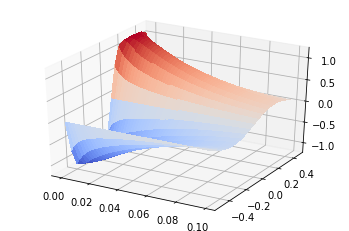

In [4]:
path = draw_sample_trajectory(sigma=0, Xinit=[0,0,0,0,0,0], Yinit=[0,1,0,0.2,0,0.04])
#plt.contourf(tgrid, xgrid, path, levels=20, cmap=cm.coolwarm)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(tgrid, xgrid, path, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

# Plots for varying sigma

Recall:
$$\partial_t u = \tfrac12 \partial_{xx} u + \sigma \partial_x u \partial_t W, \quad u(0,\_) = u_0$$

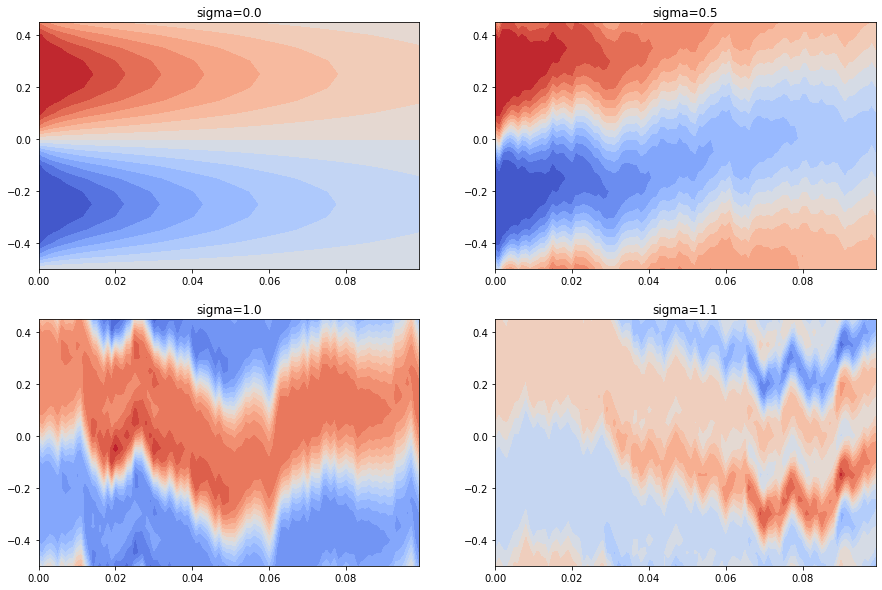

In [6]:
path_00 = draw_sample_trajectory(sigma=0.0, Xinit=[0,0,0,0,0,0], Yinit=[0,1,0,0.2,0,0.04])
path_05 = draw_sample_trajectory(sigma=0.5, Xinit=[0,0,0,0,0,0], Yinit=[0,1,0,0.2,0,0.04])
path_10 = draw_sample_trajectory(sigma=1.0, Xinit=[0,0,0,0,0,0], Yinit=[0,1,0,0.2,0,0.04])
path_11 = draw_sample_trajectory(sigma=1.1, Xinit=[0,0,0,0,0,0], Yinit=[0,1,0,0.2,0,0.04])
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].contourf(tgrid, xgrid, path_00, levels=20, cmap=cm.coolwarm)
axs[0][0].set_title('sigma=0.0')
axs[0][1].contourf(tgrid, xgrid, path_05, levels=20, cmap=cm.coolwarm)
axs[0][1].set_title('sigma=0.5')
axs[1][0].contourf(tgrid, xgrid, path_10, levels=20, cmap=cm.coolwarm)
axs[1][0].set_title('sigma=1.0')
axs[1][1].contourf(tgrid, xgrid, path_11, levels=20, cmap=cm.coolwarm)
axs[1][1].set_title('sigma=1.1')
plt.show()